# Scatterplots

In [3]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [4]:
#Read in csv file
data_by_year = pd.read_csv("archive/data_by_year.csv")
data_by_year

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1920,0.631242,0.515750,238092.997135,0.418700,0.354219,0.216049,-12.654020,0.082984,113.226900,0.498210,0.610315,2,1
1,1921,0.862105,0.432171,257891.762821,0.241136,0.337158,0.205219,-16.811660,0.078952,102.425397,0.378276,0.391026,2,1
2,1922,0.828934,0.575620,140135.140496,0.226173,0.254776,0.256662,-20.840083,0.464368,100.033149,0.571190,0.090909,5,1
3,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.205405,0,1
4,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2017,0.207413,0.580475,243402.249536,0.686392,0.247068,0.231513,-8.026319,0.096717,121.829807,0.436313,31.662338,1,1
98,2018,0.233836,0.602731,227073.140015,0.659552,0.229874,0.231009,-8.173434,0.121045,123.644288,0.426566,27.599484,7,1
99,2019,0.261344,0.603101,225463.326320,0.629781,0.221123,0.218501,-8.527674,0.106820,122.419702,0.457813,32.346930,7,1
100,2020,0.202303,0.605285,218977.482767,0.674247,0.249008,0.234415,-8.077563,0.100629,124.058308,0.468030,24.064741,0,1


Reduced data to years 1945 - 2020 to eliminate outliers from a lack of data from the years 1921 - 1944. 

In [5]:
data_last_75 = data_by_year.loc[(data_by_year["year"] >= 1945) & (data_by_year["year"] <= 2020)]
data_last_75

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
25,1945,0.711386,0.517856,195720.266500,0.225413,0.274928,0.203334,-16.927997,0.301714,108.256917,0.491416,2.093000,0,1
26,1946,0.920627,0.415141,266923.718642,0.222361,0.486736,0.210503,-16.897529,0.088526,103.121426,0.400751,1.659954,7,1
27,1947,0.915655,0.472104,232131.882701,0.262955,0.351209,0.223445,-14.414844,0.100229,108.972883,0.509181,1.642180,0,1
28,1948,0.922949,0.462736,200208.082000,0.241484,0.361887,0.218799,-15.517199,0.160782,107.684211,0.462211,1.429500,0,1
29,1949,0.907088,0.444031,223351.576000,0.247214,0.298759,0.209581,-15.490747,0.103392,108.875563,0.434334,3.771000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2016,0.226944,0.581583,258001.186462,0.656547,0.203332,0.221417,-8.002876,0.097232,123.814929,0.432452,29.212431,7,1
97,2017,0.207413,0.580475,243402.249536,0.686392,0.247068,0.231513,-8.026319,0.096717,121.829807,0.436313,31.662338,1,1
98,2018,0.233836,0.602731,227073.140015,0.659552,0.229874,0.231009,-8.173434,0.121045,123.644288,0.426566,27.599484,7,1
99,2019,0.261344,0.603101,225463.326320,0.629781,0.221123,0.218501,-8.527674,0.106820,122.419702,0.457813,32.346930,7,1


The r-squared is: 0.7936861482748231


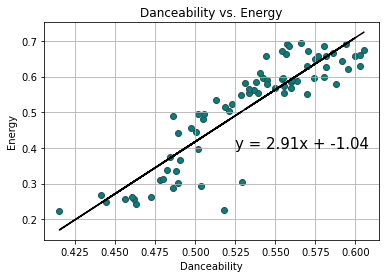

In [6]:
#Scatterplot of danceability vs. energy
x_values = data_last_75["danceability"]
y_values = data_last_75["energy"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot the scatter plot and linear regression
plt.scatter(x_values, y_values, facecolor="teal", edgecolor="darkslategrey")
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(0.525, 0.4),fontsize=15,color="black")
#Add grid
plt.grid()
#Set titles, x and y labels
plt.title("Danceability vs. Energy")
plt.xlabel("Danceability")
plt.ylabel("Energy")
#Print the r-squared value
print(f"The r-squared is: {rvalue**2}")
#Save PNG of plot
plt.savefig("output_data/danceability_energy.png")
#Display scatter plot
plt.show()

The r-squared is: 0.6962223219574084


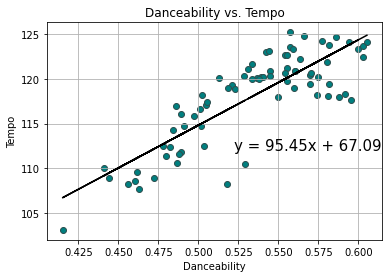

In [7]:
#Scatterplot of danceability vs. tempo
x_values = data_last_75["danceability"]
y_values = data_last_75["tempo"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot the scatter plot and linear regression
plt.scatter(x_values, y_values, facecolor="teal", edgecolor="darkslategrey")
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(0.522, 112),fontsize=15,color="black")
#Add grid
plt.grid()
#Set titles, x and y labels
plt.title("Danceability vs. Tempo")
plt.xlabel("Danceability")
plt.ylabel("Tempo")
#Print the r-squared value
print(f"The r-squared is: {rvalue**2}")
#Save PNG of plot
plt.savefig("output_data/danceability_tempo.png")
#Display scatter plot
plt.show()

The r-squared is: 0.8042697328926884


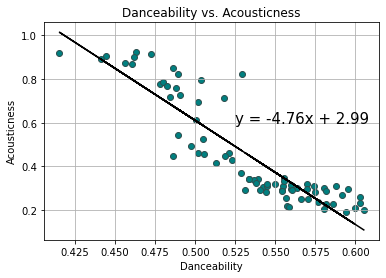

In [8]:
#Scatterplot of danceability vs. acousticness
x_values = data_last_75["danceability"]
y_values = data_last_75["acousticness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot the scatter plot and linear regression
plt.scatter(x_values, y_values, facecolor="teal", edgecolor="darkslategrey")
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(0.525, 0.6),fontsize=15,color="black")
#Add grid
plt.grid()
#Set titles, x and y labels
plt.title("Danceability vs. Acousticness")
plt.xlabel("Danceability")
plt.ylabel("Acousticness")
#Print the r-squared value
print(f"The r-squared is: {rvalue**2}")
#Save PNG of plot
plt.savefig("output_data/danceability_acousticness.png")
#Display scatter plot
plt.show()

The r-squared is: 0.22037354193469813


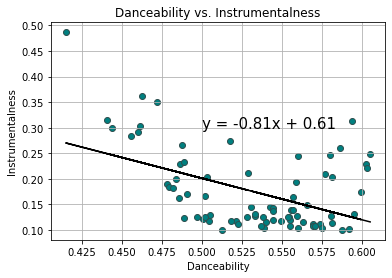

In [9]:
#Scatterplot of danceability vs. instrumentalness
x_values = data_last_75["danceability"]
y_values = data_last_75["instrumentalness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot the scatter plot and linear regression
plt.scatter(x_values, y_values, facecolor="teal", edgecolor="darkslategrey")
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(0.5, 0.3),fontsize=15,color="black")
#Add grid
plt.grid()
#Set titles, x and y labels
plt.title("Danceability vs. Instrumentalness")
plt.xlabel("Danceability")
plt.ylabel("Instrumentalness")
#Print the r-squared value
print(f"The r-squared is: {rvalue**2}")
#Save PNG of plot
plt.savefig("output_data/danceability_instrumentalness.png")
#Display scatter plot
plt.show()

The r-squared is: 0.003657192293678548


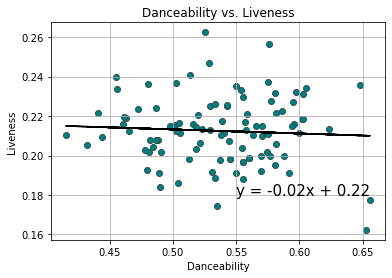

In [10]:
#Scatterplot of danceability vs. liveness
x_values = data_by_year["danceability"]
y_values = data_by_year["liveness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot the scatter plot and linear regression
plt.scatter(x_values, y_values, facecolor="teal", edgecolor="darkslategrey")
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(0.55, 0.18),fontsize=15,color="black")
#Add grid
plt.grid()
#Set titles, x and y labels
plt.title("Danceability vs. Liveness")
plt.xlabel("Danceability")
plt.ylabel("Liveness")
#Print the r-squared value
print(f"The r-squared is: {rvalue**2}")
#Save PNG of plot
plt.savefig("output_data/danceability_liveness.png")
#Display scatter plot
plt.show()

The r-squared is: 0.5172513852604579


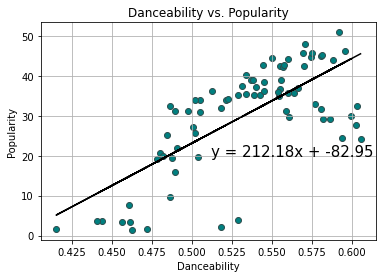

In [16]:
#Scatterplot of danceability vs. popularity
x_values = data_last_75["danceability"]
y_values = data_last_75["popularity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot the scatter plot and linear regression
plt.scatter(x_values, y_values, facecolor="teal", edgecolor="darkslategrey")
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(0.512, 20),fontsize=15,color="black")
#Add grid
plt.grid()
#Set titles, x and y labels
plt.title("Danceability vs. Popularity")
plt.xlabel("Danceability")
plt.ylabel("Popularity")
#Print the r-squared value
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/danceability_popularity.png")
#Display scatter plot
plt.show()

The r-squared is: 0.22934178186368726


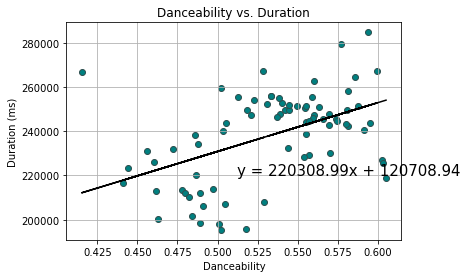

In [17]:
#Scatterplot of danceability vs. duration
x_values = data_last_75["danceability"]
y_values = data_last_75["duration_ms"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot the scatter plot and linear regression
plt.scatter(x_values, y_values, facecolor="teal", edgecolor="darkslategrey")
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(0.512, 220000),fontsize=15,color="black")
#Add grid
plt.grid()
#Set titles, x and y labels
plt.title("Danceability vs. Duration")
plt.xlabel("Danceability")
plt.ylabel("Duration (ms)")
#Print the r-squared value
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/danceability_duration.png")
#Display scatter plot
plt.show()

The r-squared is: 0.7883376938072986


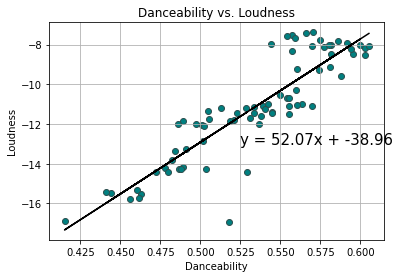

In [18]:
#Scatterplot of danceability vs. loudness
x_values = data_last_75["danceability"]
y_values = data_last_75["loudness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot the scatter plot and linear regression
plt.scatter(x_values, y_values, facecolor="teal", edgecolor="darkslategrey")
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(0.525, -13),fontsize=15,color="black")
#Add grid
plt.grid()
#Set titles, x and y labels
plt.title("Danceability vs. Loudness")
plt.xlabel("Danceability")
plt.ylabel("Loudness")
#Print the r-squared value
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/danceability_loudness.png")
#Display scatter plot
plt.show()

The r-squared is: 0.00017662617275349894


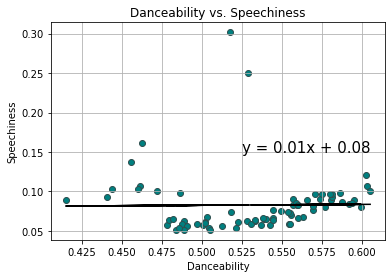

In [23]:
#### Scatterplot of danceability vs. speechiness
x_values = data_last_75["danceability"]
y_values = data_last_75["speechiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot the scatter plot and linear regression
plt.scatter(x_values, y_values, facecolor="teal", edgecolor="darkslategrey")
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(0.525, 0.15),fontsize=15,color="black")
#Add grid
plt.grid()
#Set titles, x and y labels
plt.title("Danceability vs. Speechiness")
plt.xlabel("Danceability")
plt.ylabel("Speechiness")
#Print the r-squared value
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/danceability_speechiness.png")
#Display scatter plot
plt.show()